In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
bank_df = pd.read_csv('C:/Users/ssant/Downloads/Learning/bank/bank-full.csv',delimiter=';')
bank_df.head()
# bank_df[(bank_df['month'] =='apr') | (bank_df['month'] =='may')| (bank_df['month'] =='jun')]['month']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
bank_df['month']
bank_df_m = bank_df[(bank_df['month'] =='apr') | (bank_df['month'] =='may')| (bank_df['month'] =='jun')]['month']
bank_df_m

0        may
1        may
2        may
3        may
4        may
        ... 
44046    jun
44047    jun
44048    jun
44049    jun
44050    jun
Name: month, Length: 22039, dtype: object

In [4]:
# fig1 = plt.figure(figsize=(5,5))
# axis1 = fig1.add_axes([1,0.4,0.5,1])
# axis2 = fig1.add_axes([0.1,0.5,0.6,1])
# axis1.set_title('Testing axis 1')
# axis2.set_title('Testing axis 2')
# plt.show()

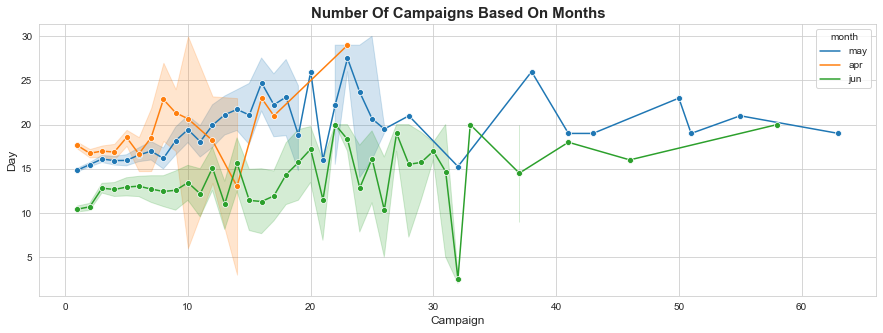

In [5]:
plt.figure(figsize=(15,5))

sns.set_style('whitegrid')
line_pt = sns.lineplot(x = bank_df['campaign'], y =bank_df['day'],
                       hue = bank_df_m, hue_order=['may','apr','jun'], marker="o")
line_pt.set_xlabel("Campaign", fontsize=12)
line_pt.set_ylabel("Day", fontsize=12)
line_pt.set_title("Number Of Campaigns Based On Months", fontsize=15, fontweight='bold')
fig_1 = line_pt.get_figure()
fig_1.savefig("Line_Plot.png",bbox_inches='tight') 

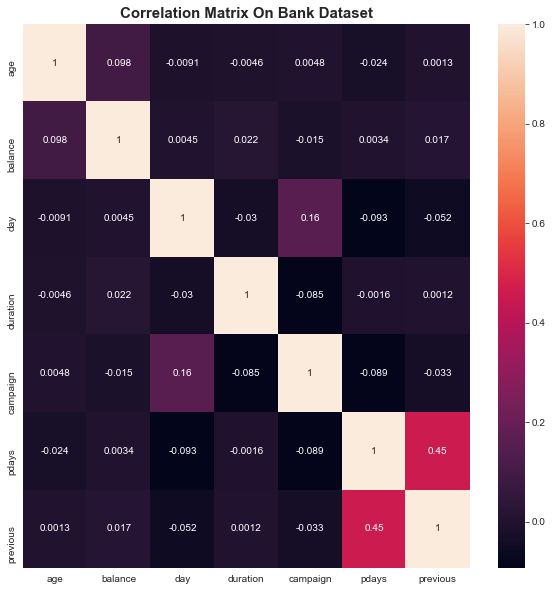

In [6]:
plt.figure(figsize=(10,10))
corr = bank_df.corr()
heat_pt = sns.heatmap(corr, annot=True)
heat_pt.set_title('Correlation Matrix On Bank Dataset', fontsize=15 , fontweight='bold')
fig_2 = heat_pt.get_figure()
fig_2.savefig("HeatMap.png")

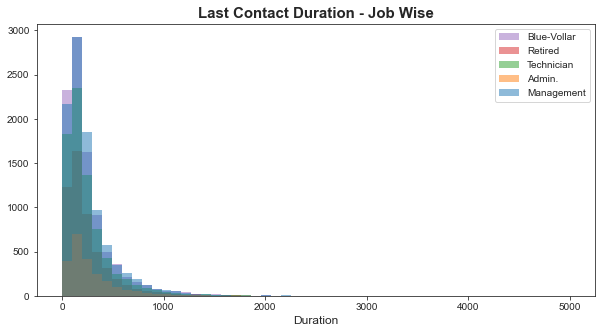

In [8]:
plt.figure(figsize=(10,5))
sns.set_style('ticks')
jobs = bank_df[bank_df.job.isin(['blue-collar', 'retired', 'technician', 'admin.', 'management'])]

hist_pt = sns.histplot(data=jobs, x='duration',stat='count',hue='job'
                       ,hue_order=['blue-collar', 'retired', 'technician', 'admin.', 'management']
                       ,binwidth=98
                       ,edgecolor=None
                       ,linewidth=0)
hist_pt.set_xlabel('Duration', fontsize=12)
hist_pt.set_ylabel(None)
hist_pt.set_title('Last Contact Duration - Job Wise', fontsize=15, fontweight='bold')
hist_pt.legend_.set_title(None)
hist_pt.legend(['Blue-Vollar', 'Retired', 'Technician', 'Admin.', 'Management'])

fig_3 = hist_pt.get_figure()
fig_3.savefig("Hist-Plot.png")

In [9]:
numeric_cols= bank_df.select_dtypes(np.number)
numeric_cols.drop(columns='age',inplace=True)
numeric_cols

C:\Users\ssant\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,balance,day,duration,campaign,pdays,previous
0,2143,5,261,1,-1,0
1,29,5,151,1,-1,0
2,2,5,76,1,-1,0
3,1506,5,92,1,-1,0
4,1,5,198,1,-1,0
...,...,...,...,...,...,...
45206,825,17,977,3,-1,0
45207,1729,17,456,2,-1,0
45208,5715,17,1127,5,184,3
45209,668,17,508,4,-1,0


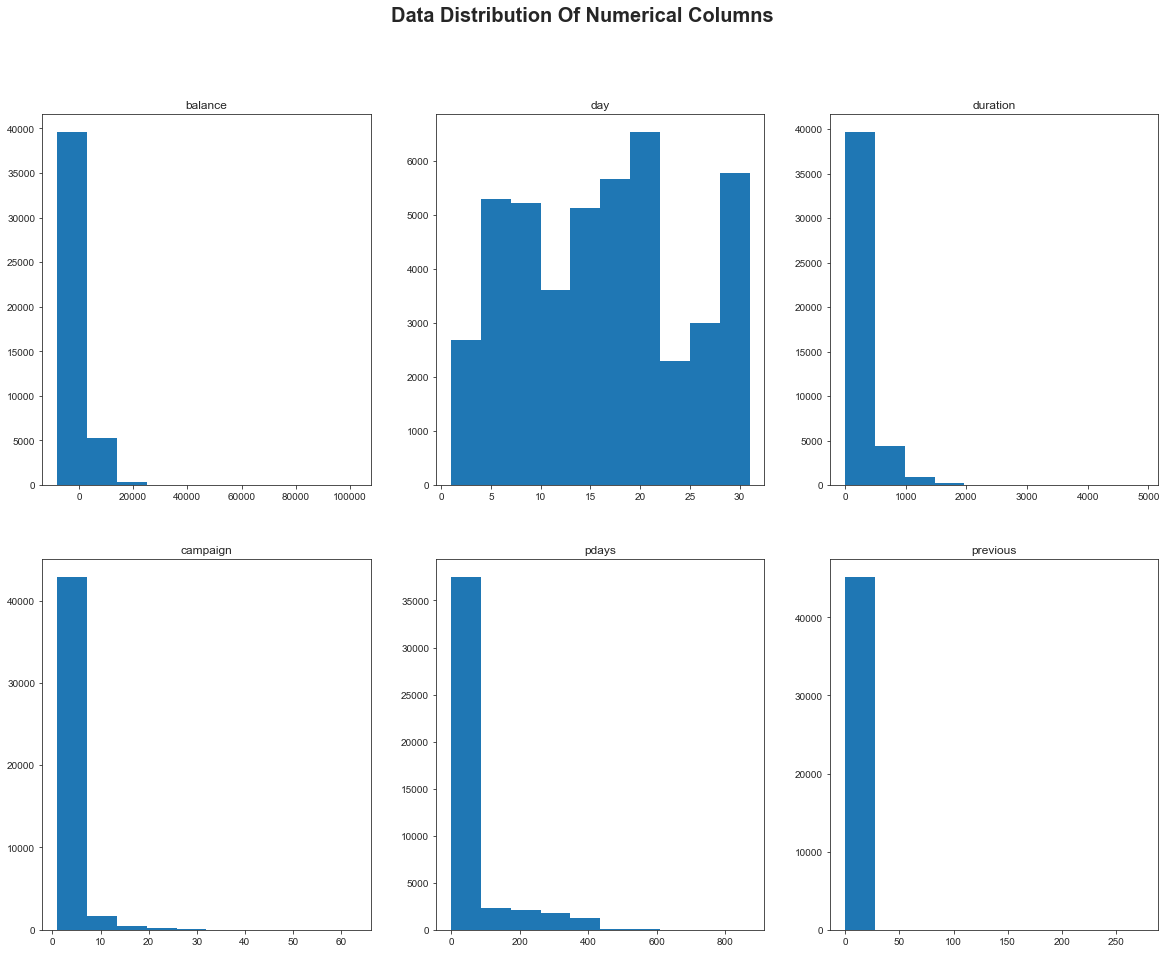

In [10]:
fig_4, axes = plt.subplots(2,3, figsize=(20,15))

axes[0, 0].hist(data=numeric_cols, x='balance', bins=10, edgecolor=None, linewidth=0)
axes[0, 1].hist(data=numeric_cols, x='day', bins=10, edgecolor=None, linewidth=0,)
axes[0, 2].hist(data=numeric_cols, x='duration', bins=10, edgecolor=None, linewidth=0)
axes[1, 0].hist(data=numeric_cols, x='campaign', bins=10, edgecolor=None, linewidth=0)
axes[1, 1].hist(data=numeric_cols, x='pdays', bins=10, edgecolor=None, linewidth=0)
axes[1, 2].hist(data=numeric_cols, x='previous', bins=10, edgecolor=None, linewidth=0)
fig_4.suptitle('Data Distribution Of Numerical Columns', fontsize=20, fontweight='bold')
axes[0, 0].set_title('balance')
axes[0, 1].set_title('day')
axes[0, 2].set_title('duration')
axes[1, 0].set_title('campaign')
axes[1, 1].set_title('pdays')
axes[1, 2].set_title('previous')

fig_4.savefig("Sub-Plots.png")

In [58]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
cols_n = bank_df._get_numeric_data().columns
cat_cols = list(set(bank_df.columns)-set(cols_n))
col_set = {col:'category' for col in cat_cols}
bank_df=bank_df.astype(col_set,copy=True)
bank_df_cat = bank_df.copy()
bank_df_cat.drop(columns=bank_df._get_numeric_data(),axis=1,inplace=True)
# bank_df_cat.drop(columns='y',axis=1,inplace=True)

bank_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  category
 1   marital    45211 non-null  category
 2   education  45211 non-null  category
 3   default    45211 non-null  category
 4   housing    45211 non-null  category
 5   loan       45211 non-null  category
 6   contact    45211 non-null  category
 7   month      45211 non-null  category
 8   poutcome   45211 non-null  category
 9   y          45211 non-null  category
dtypes: category(10)
memory usage: 443.6 KB


In [60]:
bank_df_cat.drop(bank_df_cat[bank_df_cat['poutcome']=='other'].index,inplace=True)
bank_df_cat.drop(bank_df_cat[bank_df_cat['month']=='dec'].index,inplace=True)

In [61]:
# for col in bank_df_cat:
#     print(bank_df_cat[col].unique())

In [62]:
# import pandas as pd
# from sklearn import preprocessing

# x = bank_df_cat.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [63]:
bank_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43183 entries, 0 to 45209
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        43183 non-null  category
 1   marital    43183 non-null  category
 2   education  43183 non-null  category
 3   default    43183 non-null  category
 4   housing    43183 non-null  category
 5   loan       43183 non-null  category
 6   contact    43183 non-null  category
 7   month      43183 non-null  category
 8   poutcome   43183 non-null  category
 9   y          43183 non-null  category
dtypes: category(10)
memory usage: 761.0 KB


In [64]:
def nrmlzd_rel_frq(df,cat,col):
    y_count = df[(df[col]==cat)&(df['y']=='yes')].count()[0]/df[(df['y']=='yes')].count()[0]
    n_count = df[(df[col]==cat)&(df['y']=='no')].count()[0]/df[(df['y']=='no')].count()[0]
    return y_count-n_count
# nrmlzd_rel_frq(bank_df_cat,'telephone','contact')

In [65]:
# bank_df_cat.groupby('contact')['y'].count()
def pos_rel_frq(df,col):
    new_df = pd.DataFrame(columns=['cat','rfd'])
    no_of_cat = len(bank_df_cat.groupby(col)['y'].count())
#   bank_df_cat.groupby(col)['y'].count()[x]
#   freqs = [(value, bank_df_cat[col].isin([value]).sum() / len(bank_df_cat[col].values)) for value in set(bank_df_cat[col].values)] 
    freqs = [(value, nrmlzd_rel_frq(df,value,col)) for value in set(bank_df_cat[col].values)] 
    for rec in freqs:
        new_df.loc[-1]=rec
        new_df.index= new_df.index+1
        new_df.sort_index(ascending=True,inplace=True)
    return new_df  
       
# bank_df_cat.groupby('contact')['y'].count()
pos_rel_frq(bank_df_cat,'job')

,cat,rfd
0,technician,-0.009200
1,housemaid,-0.007813
2,retired,0.052290
3,admin.,0.005682
4,student,0.033265
5,self-employed,0.000148
6,blue-collar,-0.089294
7,entrepreneur,-0.010342
8,unknown,0.000161
9,management,0.039092


In [310]:
bank_df_cat.groupby(col)['y'].count()
freqs = [(value, bank_df_cat.contact.isin([value]).sum() / len(bank_df_cat.contact.values)) for value in set(bank_df_cat.contact.values)] 
bank_df_cat.groupby('y')['y'].count()

y
no     38289
yes     4894
Name: y, dtype: int64

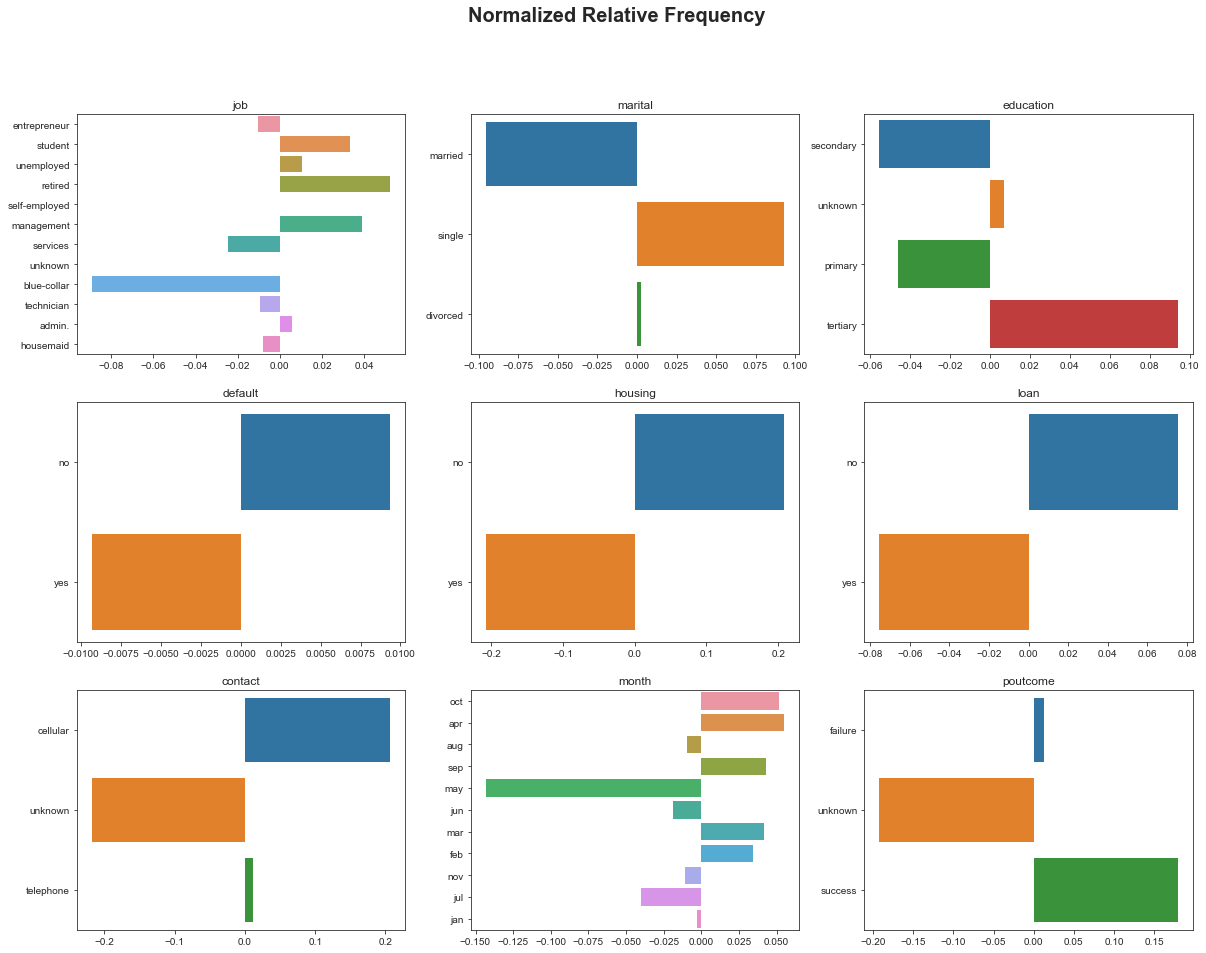

In [445]:
fig_5, axs = plt.subplots(3,3, figsize=(20,15))
sns.barplot(ax=axs[0, 0], data=pos_rel_frq(bank_df_cat,'job'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('job')
sns.barplot(ax=axs[0, 1], data=pos_rel_frq(bank_df_cat,'marital'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('marital')
sns.barplot(ax=axs[0, 2], data=pos_rel_frq(bank_df_cat,'education'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('education')
sns.barplot(ax=axs[1, 0], data=pos_rel_frq(bank_df_cat,'default'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('default')
sns.barplot(ax=axs[1, 1], data=pos_rel_frq(bank_df_cat,'housing'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('housing')
sns.barplot(ax=axs[1, 2], data=pos_rel_frq(bank_df_cat,'loan'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('loan')
sns.barplot(ax=axs[2, 0], data=pos_rel_frq(bank_df_cat,'contact'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('contact')
sns.barplot(ax=axs[2, 1], data=pos_rel_frq(bank_df_cat,'month'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('month')
sns.barplot(ax=axs[2, 2], data=pos_rel_frq(bank_df_cat,'poutcome'), x='rfd',y='cat', edgecolor=None, linewidth=0,).set_title('poutcome')

#Crearling x,y labels
for i in range(0, 3 * 3):
    row = i // 3
    col = i % 3
    axs[row][col].set_ylabel('')    
    axs[row][col].set_xlabel('')

fig_5.suptitle('Normalized Relative Frequency', fontsize=20, fontweight='bold')
fig_5.savefig('Norm-HBar-Plot.png')